In [ ]:
!pip install shap
import json

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

import shap
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.9 MB/s eta 0:00:00


In [ ]:
# load pre-trained model and data
model = ResNet50(weights="imagenet")
X, y = shap.datasets.imagenet50()

102967424/102967424 [==============================] - 5s 0us/step


In [ ]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

In [ ]:
import shap
import numpy as np
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
import numpy as np
import time

# Load the ResNet50 model pre-trained on ImageNet
model = ResNet50(weights="imagenet")

# Define the function to preprocess input and get model output
def f(x):
    tmp = x.copy()
    prep = preprocess_input(tmp)  # Preprocess input as required by ResNet50
    return model.predict(prep)

img_path = 'cat.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
out = keras.utils.img_to_array(img)
out = np.expand_dims(out, axis=0)

# Define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", shape=out[0].shape)

# Create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

start_time = time.time()

# Here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(
    out[0:1], max_evals=15000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1]
)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

2/2 [==============================] - 0s 79ms/step


  0%|          | 0/14998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer: 2it [05:14, 314.26s/it]              

Execution time: 314.26645970344543 seconds


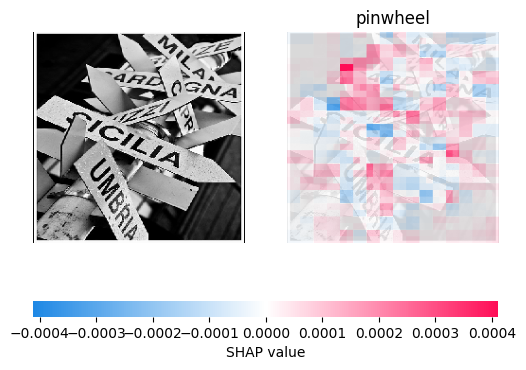

In [ ]:
shap.image_plot(shap_values, out[0:1] / 255)